In [1]:
!pip install pandas pyreadstat openpyxl
import pandas as pd
#df = pd.read_stata(r"/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3/data_unificado_normalizado.dta")
df = pd.read_stata(r"C:\Users\caval\Desktop\tp2\data_unificado_normalizado.dta")


In [2]:
# Convertir fechas a string si existen columnas datetime
for col in df.select_dtypes(include=["datetime64"]).columns:
    df[col] = df[col].astype(str)

# Convertir todas las columnas 'object' a string y reemplazar NaN
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype(str).replace("nan", "").replace("None", "")

# Revisar si hay columnas problemáticas
for col in df.columns:
    if df[col].dtype == "object":
        try:
            df[col].astype(str)  # Intentamos asegurarnos de que todas sean strings
        except Exception as e:
            print(f"Error en la columna {col}: {e}")

In [4]:
#Guardamos la base
df.to_stata(r"C:\Users\caval\Desktop\tp2\dataframe.dta")
#df.to_stata(r"/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3/dataframe.dta")

In [5]:
#Filtramos la variable aglomerado
provincias = ['jujuy - palpala', 'salta', 'santiago del estero - la banda', '18', '19', '23']
df = df[df['aglomerado'].isin(provincias)]

In [6]:
#Vemos que valores toma cada variable 
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Valores únicos en '{col}':")
    print(unique_values)
    print("-" * 50)  # Separador entre variables

Valores únicos en 'codusu':
['125624' '125666' '125788' ... 'tqrmnorpyhmlkncdehjgh00800782'
 'tqrmnotrqhlokmcdegoih00853445' 'tqrmnoptphjolscdehjgh00797862']
--------------------------------------------------
Valores únicos en 'nro_hogar':
[1. 2. 3. 4. 5.]
--------------------------------------------------
Valores únicos en 'componente':
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0' '10.0' '11.0'
 '12.0' '13.0' '14.0' 'servicio domestico en hogares' '15.0' '1' '2' '3'
 '4' '5' '6' '7' '8' '9' '10' '11' '12' '13']
--------------------------------------------------
Valores únicos en 'h15':
['si' '0.0' '1' '0' '2']
--------------------------------------------------
Valores únicos en 'ano4':
[2004. 2024.]
--------------------------------------------------
Valores únicos en 'trimestre':
['1er. trimestre' '1']
--------------------------------------------------
Valores únicos en 'region':
['noa' '40']
--------------------------------------------------
Valores únicos en 'mas_500':
['n

In [7]:
#Unificamos valores de componente
df['componente'] = df['componente'].replace({
    'servicio domestico en hogares': 51, 
    'Pensionistas en hogares': 71
})

df['componente'] = df['componente'].astype(float).astype(int)
print(df['componente'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 51 15]


In [8]:
#Unificamos valores en h15
df['h15'] = df['h15'].replace({
    'si': 1, 
    'no': 2
})
df['h15'] = df['h15'].astype(float).astype(int)
print(df['h15'].unique())

[1 0 2]


In [9]:
import numpy as np 

In [10]:
#Unificamos valores en trimestre
df['trimestre'] = df['trimestre'].replace({
    '1er. trimestre': 1
})
df['trimestre'] = df['trimestre'].astype(float).astype(int)
print(df['trimestre'].unique())

[1]


In [11]:
#Unificamos valores en region
df['region'] = df['region'].replace({
    'noa': 40
})
df['region'] = df['region'].astype(float).astype(int)
print(df['region'].unique())

[40]


In [12]:
#Unificamos valores en aglomerado
df['aglomerado'] = df['aglomerado'].replace({
    'santiago del estero - la banda': 18,
    'jujuy - palpala': 19,
    'salta': 23
})
df['aglomerado'] = df['aglomerado'].astype(int)
print(df['aglomerado'].unique())

[18 19 23]


In [13]:
#Unificamos valores en ch03
import numpy as np 
df['ch03'] = df['ch03'].replace({
    'jefe': 1, 
    'conyuge/pareja': 2,
    'hijo/hijastro': 3,
    'yerno/nuera': 4,
    'nieto': 5,
    'madre/padre': 6,
    'suegro': 7,
    'hermano': 8,
    'otros familiares': 9,
    'no familiares': 10
})
df['ch03'] = df['ch03'].astype(int)
print(df['ch03'].unique())

[ 1  2  3  5  6  8  9  4 10  7]


In [14]:
#Unificamos valores en ch04
df['ch04'] = df['ch04'].replace({
    'varon': 1,
    'mujer': 2
})
df['ch04'] = df['ch04'].astype(int)
print(df['ch04'].unique())

[2 1]


In [16]:
df['ch07'] = df['ch07'].astype(str)  # Asegura que todo es string antes del reemplazo
df['ch07'] = df['ch07'].replace({
    'casado': 2,
    'soltero': 5,
    'unido': 1,
    'separado o divorciado': 3,
    'viudo': 4
})
df['ch07'] = df['ch07'].astype(int)
print(df['ch07'].unique())

[3 1 5 2 4]


In [17]:
#Unificamos valores en ch08
df['ch08'] = df['ch08'].replace({
    'no paga ni le descuentan': 4,
    'mutual/prepaga/servicio de emergencia': 2,
    'obra social (incluye pami)': 1,
    'obra social y mutual/prepaga/servicio de emergencia': 12,
    'obra social y planes y seguros publicos': 13, 
    'ns./nr.': 9,
    'planes y seguros publicos': 3
})
df['ch08'] = df['ch08'].astype(int)
print(df['ch08'].unique())

[12  4  2  1  9  3 13 23]


In [18]:
#Unificamos valores en ch09
df['ch09'] = df['ch09'].replace({
    'si': 1,
    'no': 2, 
    'menor de 2 anos': 3
})
df['ch09'] = df['ch09'].astype(int)
print(df['ch09'].unique())

[1 2 3]


In [19]:
import numpy as np 

In [20]:
#Unificamos valores en ch10
#Unificamos valores en ch10
df['ch10'] = df ['ch10'].replace({
    '0': np.nan, 
    'no asiste, pero asistio': 2, 
    'si, asiste': 1, 
    'nunca asistio': 3,
    '0.0': np.nan
})
print(df['ch10'].unique())

[2 1 3 nan '2' '1' '3']


In [21]:
#Unificamos valores en ch11
df['ch11'] = df ['ch11'].replace({
    '0': np.nan,
    '0.0': np.nan,
    'privado': 2, 
    'publico': 1, 
    'ns./nr.': 9
})
print(df['ch11'].unique())

[nan 1 2 9 '1' '2']


In [28]:
import numpy as np

# Convertimos todos los valores a string para unificar
df['ch12'] = df['ch12'].astype(str)

# Reemplazamos
df['ch12'] = df['ch12'].replace({
    'secundario': '4',
    'polimodal': '5',
    'egb': '3',
    'primario': '2',
    'terciario': '6',
    '0': np.nan,
    '0.0': np.nan,
    'universitario': '7',
    'jardin/preescolar': '1',
    'educacion especial (discapacitado)': '9',
    'posgrado universitario': '8'
})

# Vemos los valores únicos
print(df['ch12'].unique())


['2' '4' '5' '3' 'nan' '1' '6' '7' '8' '9']


In [29]:
#Unificamos valores en ch13
df['ch13'] = df ['ch13'].replace({
    '0': np.nan,
    '0.0': np.nan,
    'no': 2, 
    'si': 1
})
print(df['ch13'].unique())

[1 2 nan '1' '2']


In [30]:
#Unificamos valores en ch14
df['ch14'] = df ['ch14'].replace({
    '': np.nan
})
print(df['ch14'].unique())

[nan '01' '00' '06' '04' '02' '03' '07' '05' '99' '08' '09' '98' '2.0'
 '4.0' '3.0' '1.0' '0.0' '6.0' '5.0' '98.0' '99.0' '9.0']


In [31]:
#Unificamos valores en ch15
df['ch15'] = df ['ch15'].replace({
    'en esta localidad': 1,
    'en otra provincia (especificar)': 3,
    'en otro pais': 5,
    'en otra localidad': 2,
    'en un pais limitrofe': 4
})
df['ch15'] = df['ch15'].astype(int)
print(df['ch15'].unique())

[2 1 3 5 4]


In [32]:
#Unificamos valores en ch16
df['ch16'] = df ['ch16'].replace({
    'en esta localidad': 1,
    'no habia nacido': 6,
    'en otra localidad de esta provincia': 2,
    'en otra provincia (especificar)': 3,
     'en un pais limitrofe': 4,
    'en otro pais': 5
})
df['ch16'] = df['ch16'].astype(int)
print(df['ch16'].unique())

[1 2 6 3 5 4]


In [33]:
#Unificamos valores en nivel_ed
df['nivel_ed'] = df ['nivel_ed'].replace({
    'primaria incompleta (incluye educacion especial)': 1,
    'primaria completa': 2,
    'secundaria incompleta': 3,
    'secundaria completa': 4,
    'superior universitaria incompleta': 5,
    'superior universitaria completa': 6,
    'sin instruccion': 7,
    'ns./nr.': 9
})
df['nivel_ed'] = df['nivel_ed'].astype(int)
print(df['nivel_ed'].unique())

[2 3 1 4 7 6 5]


In [34]:
#Unificamos valores en estado
df['estado'] = df ['estado'].replace({
    'entrevista individual no realizada (no respuesta al cuestion': 0,
    'ocupado': 1,
    'desocupado': 2,
    'inactivo': 3,
    'menor de 10 anos': 4
})
df['estado'] = df['estado'].astype(int)
print(df['estado'].unique())

[3 2 4 1 0]


In [35]:
#Unificamos valores en cat_ocup
df['cat_ocup'] = df ['cat_ocup'].replace({
    'patron': 1,
    'cuenta propia': 2,
    'obrero o empleado': 3,
    'trabajador familiar sin remuneracion': 4,
    'ns/nr': 9
})
print(df['cat_ocup'].unique())

['0.0' 2 3 1 4 '3' '0' '2' '1' '4']


In [36]:
# Unificamos valores en cat_inac
df['cat_inac'] = df['cat_inac'].replace({
    'jubilado/pensionado': 1,
    'rentista': 2,
    'estudiante': 3,
    'ama de casa': 4,
    'menor de 6 anos': 5,
    'discapacitado': 6,
    'otros': 7
})
print(df['cat_inac'].unique())

[1 '0.0' 4 3 5 7 6 2 '0' '1' '7' '3' '4' '2' '5' '6']


In [37]:
import numpy as np

In [38]:
# Unificamos de una sola vez a TODAS aquellas variables que tomen valor si o no en una base y 1 y 2 en la otra. 
variables = ['pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02h','pp02i', 'pp03g', 'pp03i', 'pp03j', 'pp05e', 'pp06a', 'pp06h', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp09b', 'pp10c', 'pp10d', 'pp11n', 'pp11p', 'pp11q', 'pp11r', 'pp11s', 'pp11t']

# Aplicamos las transformaciones a cada variable
for var in variables:
    df[var] = df[var].replace({
        'no': 2,
        'si': 1,
        '0': np.nan,
        '0.0': np.nan,
        '': np.nan,
        'ns./nr.': 9,
        '5.0': np.nan
    })

    print(f"Valores únicos en {var}: {df[var].unique()}")

Valores únicos en pp02c1: [nan 2 1 '2' '1']
Valores únicos en pp02c2: [nan 2 1 '1' '2']
Valores únicos en pp02c3: [nan 1 2 '2' '1']
Valores únicos en pp02c4: [nan 2 1 '2' '1']
Valores únicos en pp02c5: [nan 1 2 '2' '1']
Valores únicos en pp02c6: [nan 1 2 '2' '1']
Valores únicos en pp02c7: [nan 2 1 '2' '1']
Valores únicos en pp02c8: [nan 2 1 '2' '1']
Valores únicos en pp02h: [2 nan 1 '2' '1']
Valores únicos en pp02i: [2 nan 1 '2' '1']
Valores únicos en pp03g: [nan 2 1 '2.0' '1.0']
Valores únicos en pp03i: [nan 2 1 9 '2.0' '1.0' '9.0']
Valores únicos en pp03j: [nan 2 1 '2.0' '1.0']
Valores únicos en pp05e: [nan 1 2 '1.0' '2.0']
Valores únicos en pp06a: [nan 1 2 '2.0' '1.0']
Valores únicos en pp06h: [nan 1 2 '2.0' '1.0']
Valores únicos en pp07f1: [nan 2 1 '2.0' '1.0' '9.0']
Valores únicos en pp07f2: [nan 2 1 '2.0' '1.0' '9.0']
Valores únicos en pp07f3: [nan 2 1 '2.0' '1.0']
Valores únicos en pp07f4: [nan 2 1 '2.0' '1.0']
Valores únicos en pp07g1: [nan 1 2 '1.0' '2.0']
Valores únicos en pp

C:\Users\caval\AppData\Local\Temp\ipykernel_20256\1479017061.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[var] = df[var].replace({


In [39]:
# Unificamos valores en pp02e
df['pp02e'] = df['pp02e'].replace({
    'esta suspendido': 1,
    'ya tiene trabajo asegurado': 2,
    'se canso de buscar trabajo': 3,
    'hay poco trabajo en esta epoca del ano': 4,
    'por otras razones': 5
})
print(df['pp02e'].unique())

['0.0' 3 4 5 '0' '5' '4' '3' '2']


In [40]:
# Unificamos valores en pp03c
df['pp03c'] = df['pp03c'].replace({
    '...un solo empleo/ocupacion/actividad?': 1,
    '...mas de un empleo/ocupacion/actividad?': 2,
    '': np.nan
})
print(df['pp03c'].unique())

['0.0' 1 2 '1.0' nan '2.0']


In [41]:
# Unificamos valores en pp03g
df['pp03g'] = df['pp03g'].replace({
    'si': 1,
    'no': 2,
    '': np.nan
})
print(df['pp03g'].unique())

[nan 2 1 '2.0' '1.0']


In [42]:
# Unificamos valores en pp03h
df['pp03h'] = df['pp03h'].replace({
    '...podia trabajarlas esa semana?': 1,
    '...podia empezar a trabajarlas en dos semanas a mas tardar?': 2,
    '...no podia trabajar mas horas?': 3,
    '': np.nan
})
print(df['pp03h'].unique())

['0.0' 1 3 2 nan '1.0' '3.0' '2.0' '9.0']


In [43]:
# Unificamos valores en pp03i
df['pp03i'] = df['pp03i'].replace({
    'si': 1,
    'no': 2,
    'ns./nr.': 9,
    '': np.nan
})
print(df['pp03i'].unique())

[nan 2 1 9 '2.0' '1.0' '9.0']


In [44]:
# Unificamos valores en pp03j
df['pp03j'] = df['pp03j'].replace({
    'si': 1,
    'no': 2,
    'ns/nr': 9,
    '': np.nan
})
print(df['pp03j'].unique())

[nan 2 1 '2.0' '1.0']


In [45]:
# Unificamos valores en pp04a
df['pp04a'] = df['pp04a'].replace({
    '...estatal?': 1,
    '...privada?': 2,
    '...de otro tipo? (especificar)': 3,
    '': np.nan
})
print(df['pp04a'].unique())

['0.0' 2 3 1 '2.0' nan '1.0' '3.0']


In [46]:
# Unificamos valores en pp04b1
df['pp04b1'] = df['pp04b1'].replace({
    'casa de familia': 1,
    '': np.nan
})
print(df['pp04b1'].unique())

['0.0' '2.0' 1 nan '1.0']


In [47]:
# Unificamos valores en pp04c
df['pp04c'] = df['pp04c'].replace({
    '1 persona': 1,
    '2 personas': 2,
    '3 personas': 3,
    '4 personas': 4,
    '5 personas': 5,
    'de 6 a 10 personas': 6,
    'de 11 a 25 personas': 7,
    'de 26 a 40 personas': 8,
    'de 41 a 100 personas': 9,
    'de 101 a 200 personas': 10,
    'de 201 a 500 personas': 11,
    'mas de 500 personas': 12,
    'ns./nr.': 99,
    '': np.nan
})
print(df['pp04c'].unique())

['0.0' 8 2 7 9 10 4 3 11 99 6 1 5 12 '7.0' nan '3.0' '99.0' '8.0' '5.0'
 '10.0' '1.0' '2.0' '6.0' '4.0' '12.0' '9.0' '11.0']


In [48]:
# Unificamos valores en pp04c99
df['pp04c99'] = df['pp04c99'].replace({
    'hasta 5': 1,
    'de 6 a 40': 2,
    'mas de 40': 3,
    'ns./nr.': 9,
    '': np.nan
})
print(df['pp04c99'].unique())

['0.0' 9 3 2 1 nan '2.0' '9.0' '1.0' '3.0']


In [49]:
# Unificamos valores en pp04g
df['pp04g'] = df['pp04g'].replace({
    'en un local/oficina/establecimiento/negocio/taller/chacra/fi': 1,
    'en puesto o kiosco fijo callejero': 2,
    'en vehiculos: bicicleta/moto/auto/barco/bote (no incluye ser': 3,
    'en vehiculo para transporte de personas y mercaderias-aereo,': 4,
    'en obras en construccion, de infraestructura, mineria o simi': 5,
    'en esta vivienda': 6,
    'en la vivienda del socio o del patron': 7,
    'en el domicilio/local de los clientes': 8,
    'en la calle/espacios publicos/ambulante/de casa en casa/pues': 9,
    'en otro lugar': 10,
    '': np.nan
})
print(df['pp04g'].unique())

['0.0' 4 1 8 5 10 3 9 6 2 7 '4.0' nan '1.0' '9.0' '5.0' '8.0' '6.0' '3.0'
 '10.0' '7.0' '2.0']


In [50]:
# Unificamos valores en pp05c_1
df['pp05c_1'] = df['pp05c_1'].replace({
    'propio (del negocio)': 1,
    'prestado/alquilado': 2,
    'no tiene': 3,
    '': np.nan
})
print(df['pp05c_1'].unique())

['0.0' 1 3 2 nan '1.0' '3.0' '2.0']


In [51]:
# Unificamos valores en pp05c_2
df['pp05c_2'] = df['pp05c_2'].replace({
    'propio (del negocio)': 1,
    'prestado/alquilado': 2,
    'no tiene': 3,
    '': np.nan
})
print(df['pp05c_2'].unique())

['0.0' 1 3 2 nan '1.0' '3.0' '2.0']


In [52]:
# Unificamos valores en pp05c_3
df['pp05c_3'] = df['pp05c_3'].replace({
    'propio (del negocio)': 1,
    'prestado/alquilado': 2,
    'no tiene': 3,
    '': np.nan
})
print(df['pp05c_3'].unique())

['0.0' 3 1 2 nan '3.0' '1.0' '2.0']


In [53]:
# Unificamos valores en pp05f
df['pp05f'] = df['pp05f'].replace({
    'un solo cliente? (persona, empresa)': 6,
    'distintos clientes? (incluye publico en general)': 7,
    '': np.nan
})
print(df['pp05f'].unique())

['0.0' 7 6 nan '7.0' '6.0']


In [54]:
# Unificamos valores en pp05h
df['pp05h'] = df['pp05h'].replace({
    'menos de un mes': 1,
    'de 1 a 3 meses': 2,
    'mas de 3 a 6 meses': 3,
    'mas de 6 meses a 1 ano': 4,
    'mas de 1 a 5 anos': 5,
    'mas de 5 anos': 6,
    '': np.nan
})
print(df['pp05h'].unique())

['0.0' 3 6 1 5 2 4 nan '6.0' '5.0' '3.0' '4.0' '2.0' '1.0']


In [55]:
# Unificamos valores en pp06e
df['pp06e'] = df['pp06e'].replace({
    'es una sociedad juridicamente constituida? (s.a., s.r.l., co': 1,
    'es una sociedad de otra forma legal?': 2,
    'o es una sociedad convenida de palabra?': 3,
    '': np.nan
})
print(df['pp06e'].unique())


['0.0' 3 2 1 nan '3.0' '2.0']


In [56]:
#Unificamos valores en pp07a
df['pp07a'] = df['pp07a'].replace({
    '0.0': np.nan, 
    '': np.nan,
    'ns./nr.': 9,
    '...mas de 6 a 12 meses?': 4,
    '...menos de 1 mes?':1, 
    'mas de 5 anos':6, 
    'mas de 1 a 5 anos': 5,
    '...mas de 3 a 6 meses?': 3,
    '...de 1 a 3 meses?': 2
})

# Convertimos strings tipo '1.0', '2.0'... a enteros
df['pp07a'] = df['pp07a'].replace({
    '1.0': 1,
    '2.0': 2,
    '3.0': 3,
    '4.0': 4,
    '5.0': 5,
    '6.0' : 6,
    '9.0' : 9
})
# Convertimos strings tipo '1.0', '2.0'... a enteros
df['pp07a'] = df['pp07a'].replace({
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6' : 6,
    '9' : 6
})
print(df['pp07a'].unique())

[nan 5 6 'mas de 3 a 6 meses' 'menos de un mes' '1 a 3 meses'
 'mas de 6 a 12 meses' 9 1 4 2 3]


In [57]:
#Unificamos valores en pp07c
df['pp07c'] = df['pp07c'].replace({
    '0.0': np.nan, 
    '': np.nan,
    'ns./nr.': 9,
    'si (incluye changa, trabajo transitorio, por tarea u obra, s': 1,
    'no (incluye permanente, fijo, estable, de planta)': 2
})
print(df['pp07c'].unique())

[nan 2 9 1 '2.0' '9.0' '1.0']


In [58]:
#Unificamos valores en pp07d
df['pp07d'] = df['pp07d'].replace({
    '0.0': np.nan, 
    '': np.nan,
    'ns./nr.': 9,
    'solo fue esa vez/solo cuando lo llaman': 1,
    'mas de 6 a 12 meses': 4,
    'hasta 3 meses': 2,
    'mas de 3 a 6 meses': 3,
    'mas de 1 ano': 5
})
print(df['pp07d'].unique())

[nan 9 1 2 4 3 5 '9.0' '1.0' '4.0' '2.0' '5.0' '3.0']


In [59]:
#Unificamos valores en pp07e
df['pp07e'] = df['pp07e'].replace({
    '0.0': np.nan, 
    '': np.nan,
    '...un plan de empleo?': 1,
    'ninguno de estos': 4, 
    '...un periodo de prueba?': 2,
    '...una beca/pasantia/aprendizaje?': 3
})
print(df['pp07e'].unique())

[nan 4 1 2 3 '4.0' '1.0' '2.0' '3.0']


In [60]:
#Unificamos valores en pp07f5
df['pp07f5'] = df['pp07f5'].replace({
    '0.0': np.nan, 
    '': np.nan,
    'si': 5
})
print(df['pp07f5'].unique())

[nan 5 '5.0']


In [61]:
#Unificamos valores en pp07j
df['pp07j'] = df['pp07j'].replace({
    '0.0': np.nan,
    '': np.nan,
    '...de noche': 2,
    '...de otro tipo? (rotativo, dia y noche, guardias con franco' : 3,
    '...de dia? (manana/tarde)': 1
})
print(df['pp07j'].unique())

[nan 1 3 2 '1.0' '3.0' '2.0']


In [62]:
#Unificamos valores en pp07k
df['pp07k'] = df['pp07k'].replace({
    '0.0': np.nan,
    '': np.nan,
    'ns./nr.' : np.nan,
    '...le dan un papel/recibo sin nada?': 2,
    '...no le dan ni entrega nada?' : 4,
    '...entrega una factura?' : 3,
    'no cobra, es trabajador sin pago, ad-honorem' : 5,
    '...le dan recibo con sello/membrete/firma del empleador?': 1
})
print(df['pp07k'].unique())

[nan 1 4 5 2 3 '1.0' '4.0' '3.0' '2.0' '5.0']


In [63]:
#Unificamos valores en pp09a
import numpy as np 
df['pp09a'] = df['pp09a'].replace({
    '0.0': np.nan,
    '': np.nan
})
print(df['pp09a'].unique())

[nan]


C:\Users\caval\AppData\Local\Temp\ipykernel_20256\2941083753.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pp09a'] = df['pp09a'].replace({


In [64]:
#Unificamos valores en pp09a_esp
import numpy as np
df['pp09a_esp'] = df['pp09a_esp'].replace({
    '': np.nan
})
print(df['pp09a_esp'].unique())

[nan]


C:\Users\caval\AppData\Local\Temp\ipykernel_20256\2846099238.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pp09a_esp'] = df['pp09a_esp'].replace({


In [65]:
#Unificamos valores en pp09c
import numpy as np
df['pp09c'] = df['pp09c'].replace({
    '0.0': np.nan,
    '': np.nan
})
print(df['pp09c'].unique())

[nan]


C:\Users\caval\AppData\Local\Temp\ipykernel_20256\674331357.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pp09c'] = df['pp09c'].replace({


In [66]:
#Unificamos valores en pp09c_esp
import numpy as np 
df['pp09c_esp'] = df['pp09c_esp'].replace({
    '': np.nan
})
print(df['pp09c_esp'].unique())

[nan]


C:\Users\caval\AppData\Local\Temp\ipykernel_20256\1136176668.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pp09c_esp'] = df['pp09c_esp'].replace({


In [78]:
import pandas as pd
import numpy as np

# Convertimos todo a string primero
df['pp10a'] = df['pp10a'].astype(str)

# Reemplazamos los valores
df['pp10a'] = df['pp10a'].replace({
    '0.0': np.nan,
    '': np.nan,
    '...de 1 a 3 meses?': '2',
    '...mas de 6 a 12 meses?': '4',
    '...mas de 3 a 6 meses?': '3',
    '...mas de 1 ano?': '5',
    '...menos de 1 mes?': '1',
    '1.0': '1',
    '2.0': '2',
    '3.0': '3',
    '4.0': '4',
    '5.0': '5'
})

# Revisamos los valores únicos
print(df['pp10a'].unique())

['nan' '1' '3' '2' '5' '4']


In [79]:
#Unificamos valores en pp10e
df['pp10e'] = df['pp10e'].replace({
    '0.0': np.nan,
    '': np.nan,
    '...de 1 a 3 meses?': 2,
    '...mas de 6 a 12 meses?' : 4,
    '...mas de 3 a 6 meses?' : 3,
    '...mas de 1 a 3 anos?' : 5,
    '...mas de 3 anos?' : 6,
    '...menos de 1 mes?': 1
})
print(df['pp10e'].unique())

[nan 1 3 2 6 5 4 '2.0' '1.0' '5.0' '3.0' '6.0' '4.0']


In [80]:
#Unificamos valores en pp11a
df['pp11a'] = df['pp11a'].replace({
    '0.0': np.nan,
    '': np.nan,
    '...privada?': 2,
    '...estatal?': 1
})
print(df['pp11a'].unique())

[nan 2 1 '2.0' '1.0']


In [81]:
#Unificamos valores en pp11b1
df['pp11b1'] = df['pp11b1'].replace({
    '0.0': np.nan,
    '': np.nan,
    '2.0': np.nan,
    'casa de familia': 1
})
print(df['pp11b1'].unique())

[nan 1 '1.0']


In [82]:
#Unificamos valores en pp11c
df['pp11c'] = df['pp11c'].replace({
    '0.0': np.nan,
    '': np.nan,
    '2 personas': 2,
    '4 personas' : 4,
    '3 personas' : 3,
    '5 personas' : 5,
    'de 6 a 10 personas' : 6,
    'de 11 a 25 personas' : 7,
    'de 26 a 40 personas' : 8,
    'de 41 a 100 personas' : 9,
    'de 101 a 200 personas' : 10,
    'de 201 a 500 personas' : 11,
    'mas de 500 personas' : 12,
    'ns./nr.' : 99,
    '1 persona': 1
})
print(df['pp11c'].unique())

[nan 1 8 2 6 7 5 99 3 4 10 9 12 11 '1.0' '4.0' '99.0' '6.0' '2.0' '5.0'
 '3.0' '7.0' '11.0' '8.0' '9.0']


In [83]:
#Unificamos valores en pp11c99
df['pp11c99'] = df['pp11c99'].replace({
    '0.0': np.nan,
    '': np.nan,
    'ns./nr.' : 9,
    'hasta 5': 1
})
print(df['pp11c99'].unique())

[nan 9 1 '9.0' '2.0' '3.0']


In [84]:
#Unificamos valores en pp11l
df['pp11l'] = df['pp11l'].replace({
    '0.0': np.nan,
    '': np.nan,
    'falta de capital/equipamiento': 2,
    'tenia gastos demasiado altos' : 4,
    'trabajo estacional' : 3,
    'otras causas laborales (especificar)' : 5,
    'causas personales (matrimonio, embarazo, cuidado de hijos o' : 7,
    'falta de clientes/clientes que no pagan': 1
})
print(df['pp11l'].unique())

[nan 1 3 4 7 2 5 '3.0' '7.0' '5.0' '1.0']


In [85]:
#Unificamos valores en pp11l1
df['pp11l1'] = df['pp11l1'].replace({
    '0.0': np.nan,
    '': np.nan,
    '...un trabajo permanente, fijo estable, de planta, etc.?': 2,
    'ns./nr.' : 3,
    '...una changa, trabajo transitorio, por tarea u obra, suplen': 1
})
print(df['pp11l1'].unique())

[nan 1 2 3 '2.0' '1.0']


In [86]:
#Unificamos valores en pp11m
df['pp11m'] = df['pp11m'].replace({
    '0.0': np.nan,
    '': np.nan,
    '...un periodo de prueba?': 2,
    '...otro tipo de trabajo?' : 3,
    '...un plan de empleo?': 1
})
print(df['pp11m'].unique())

[nan 3 2 1 '3.0' '2.0']


In [87]:

#Unificamos valores en pp11o
df['pp11o'] = df['pp11o'].replace({
    '0.0': np.nan,
    '': np.nan,
    'por retiro voluntario del sector publico': 2,
    'por jubilacion' : 3,
    'fin del trabajo temporario/estacional' : 4,
    'le pagaban poco/no le pagaban' : 5,
    'malas relaciones laborales/malas condiciones de trabajo (ins' : 6,
    'renuncia obligada/pactada' : 7,
    'otras causas laborales' : 8,
    'por razones personales' : 9, 
    'despido/cierre': 1
})
print(df['pp11o'].unique())

[nan 4 6 1 5 2 8 7 9 3 '4.0' '1.0' '8.0' '5.0' '2.0' '9.0' '6.0']


In [88]:
#Unificamos valores decocur
df['decocur'] = df['decocur'].replace({
    '': np.nan
})
print(df['decocur'].unique())

[nan '07' '04' '03' '02' '01' '08' '09' '06' '00' '05' '10' '7' '0' '2'
 '4' '3' '5' '1' '8' '6' '9' '12']


In [89]:
#Unificamos valores idecocur
df['idecocur'] = df['idecocur'].replace({
    '': np.nan
})
print(df['idecocur'].unique())

[nan '08' '05' '04' '03' '01' '09' '07' '02' '00' '06' '10' '7.0' '0.0'
 '2.0' '4.0' '3.0' '6.0' '1.0' '8.0' '10.0' '5.0' '9.0' '12.0']


In [90]:
#Unificamos valores rdecocur
df['rdecocur'] = df['rdecocur'].replace({
    '': np.nan
})
print(df['rdecocur'].unique())

[nan '09' '06' '08' '05' '03' '01' '10' '04' '02' '00' '07' '9' '0' '3'
 '5' '4' '7' '1' '8' '2' '6' '12']


In [91]:
#Unificamos valores gdecocur
df['gdecocur'] = df['gdecocur'].replace({
    '': np.nan
})
print(df['gdecocur'].unique())

[nan '3.0' '0.0' '6.0' '10.0' '4.0' '9.0' '5.0' '2.0' '1.0' '7.0' '8.0'
 '12.0']


In [92]:
#Unificamos valores pdecocur
df['pdecocur'] = df['pdecocur'].replace({
    '': np.nan
})
print(df['pdecocur'].unique())

[nan '08' '05' '04' '03' '01' '09' '07' '02' '00' '06' '10' '7.0' '0.0'
 '2.0' '4.0' '3.0' '6.0' '1.0' '8.0' '10.0' '5.0' '9.0' '12.0']


In [93]:
#Unificamos valores adecocur
df['adecocur'] = df['adecocur'].replace({
    '': np.nan
})
print(df['adecocur'].unique())

[nan '09' '06' '08' '05' '04' '01' '10' '02' '00' '03' '07' '0' '3' '6'
 '5' '9' '1' '7' '2' '8' '4' '12']


In [94]:
#Unificamos valores gdecindr
df['gdecindr'] = df['gdecindr'].replace({
    '': np.nan
})
print(df['gdecindr'].unique())

[nan '4.0' '12.0' '7.0' '0.0' '9.0' '10.0' '8.0' '5.0' '6.0' '3.0' '1.0'
 '2.0' '13.0']


In [95]:
#Unificamos valores pdecindr
df['pdecindr'] = df['pdecindr'].replace({
    '': np.nan
})
print(df['pdecindr'].unique())

['04' '00' '01' '06' '08' '05' '03' '02' '10' '09' '07' '7.0' '2.0' '0.0'
 '4.0' '1.0' '6.0' '5.0' '9.0' '8.0' '3.0' '10.0' nan '12.0']


In [96]:
#Unificamos valores gdecifr
df['gdecifr'] = df['gdecifr'].replace({
    '': np.nan
})
print(df['gdecifr'].unique())

[nan '2.0' '12.0' '6.0' '10.0' '9.0' '4.0' '7.0' '1.0' '8.0' '5.0' '3.0']


In [97]:
#Unificamos valores pdecifr
df['pdecifr'] = df['pdecifr'].replace({
    '': np.nan
})
print(df['pdecifr'].unique())

['02' '04' '06' '03' '08' '09' '07' '10' '05' '01' '00' '8.0' '2.0' '9.0'
 '4.0' '6.0' '7.0' '3.0' '5.0' nan '1.0' '12.0' '10.0']


In [98]:
#Unificamos valores gdeccfr
df['gdeccfr'] = df['gdeccfr'].replace({
    '': np.nan
})
print(df['gdeccfr'].unique())

[nan '5.0' '12.0' '9.0' '8.0' '2.0' '4.0' '7.0' '3.0' '1.0' '6.0' '10.0']


In [99]:
#Unificamos valores pdeccfr
df['pdeccfr'] = df['pdeccfr'].replace({
    '': np.nan
})
print(df['pdeccfr'].unique())

['07' '02' '04' '03' '06' '09' '08' '10' '05' '01' '00' '6.0' '3.0' '8.0'
 '9.0' '5.0' '2.0' '10.0' '4.0' '1.0' nan '7.0' '12.0']


In [100]:
# Convertir fechas a string si existen columnas datetime
for col in df.select_dtypes(include=["datetime64"]).columns:
    df[col] = df[col].astype(str)

# Convertir todas las columnas 'object' a string y reemplazar NaN
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype(str).replace("nan", "").replace("None", "")

# Revisar si hay columnas problemáticas
for col in df.columns:
    if df[col].dtype == "object":
        try:
            df[col].astype(str)  # Intentamos asegurarnos de que todas sean strings
        except Exception as e:
            print(f"Error en la columna {col}: {e}")

In [102]:
#Guardamos la base
df.to_stata(r"C:\Users\caval\Desktop\tp2\base_final.dta", write_index=False)
#df.to_stata(r"/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3\df_final_limpiaaa.dta", write_index=False)

Parte 1 - Punto 1

In [103]:
print(df.shape)
print(f"La base tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

(9589, 172)
La base tiene 9589 filas y 172 columnas.


Parte 1 - Punto 2

In [104]:
cat_vars = df.select_dtypes(include=["object", "category"]).columns
categorias_por_variable = {var: df[var].nunique() for var in cat_vars}
categorias_por_variable = dict(sorted(categorias_por_variable.items(), key=lambda x: x[1], reverse=True))

for var, cant in categorias_por_variable.items():
    print(f"{var}: {cant} categorías")


codusu: 2516 categorías
pp04d_cod: 387 categorías
pp04b_cod: 199 categorías
pp11d_cod: 96 categorías
pp11b_cod: 83 categorías
ch15_cod: 59 categorías
ch16_cod: 29 categorías
pp04c: 28 categorías
pp11c: 25 categorías
idecocur: 24 categorías
pdecocur: 24 categorías
idecindr: 24 categorías
pdecindr: 24 categorías
ch14: 23 categorías
decocur: 23 categorías
rdecocur: 23 categorías
adecocur: 23 categorías
decindr: 23 categorías
rdecindr: 23 categorías
adecindr: 23 categorías
pdecifr: 23 categorías
pdeccfr: 23 categorías
pp04g: 22 categorías
idecifr: 22 categorías
ideccfr: 22 categorías
decifr: 21 categorías
rdecifr: 21 categorías
adecifr: 21 categorías
deccfr: 21 categorías
rdeccfr: 21 categorías
adeccfr: 21 categorías
pp11o: 17 categorías
pp05h: 14 categorías
gdecindr: 14 categorías
pp07d: 13 categorías
pp10e: 13 categorías
gdecocur: 13 categorías
pp07a: 12 categorías
gdecifr: 12 categorías
gdeccfr: 12 categorías
intensi: 11 categorías
pp07k: 11 categorías
pp11l: 11 categorías
ch12: 10 cate

In [105]:
import pandas as pd
#df = pd.read_stata(r"/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3\df_final_limpiaaa.dta")
df = pd.read_stata(r"C:\Users\caval\Desktop\tp2\base_final.dta")

# Paso 1: detectar variables categóricas (object o category o int con pocos valores)
candidatas = [col for col in df.columns if (
    df[col].dtype == 'object' or df[col].dtype.name == 'category' or df[col].nunique() <= 20)]

# Paso 2: excluir las variables que no deben ser dummificadas
excluir = [
    'codusu', 'componente'
] + [col for col in df.columns if
     col.endswith('_cod') or col.startswith(('adec', 'gdec', 'idec', 'pdec', 'rdec')) or 'decindr' in col]

categ_validas = [col for col in candidatas if col not in excluir]

# Paso 3: contar cuántas categorías tiene cada variable válida
categorias_por_var = {col: df[col].nunique() for col in categ_validas}

# Paso 4: calcular cuántas columnas nuevas se generarían
total_dummies = sum(categorias_por_var.values())

# Paso 5: estimar nueva dimensión
n_filas = df.shape[0]
n_columnas_original = df.shape[1]
n_columnas_nueva = n_columnas_original - len(categ_validas) + total_dummies

print(f"Número de variables categóricas válidas: {len(categ_validas)}")
print(f"Cantidad total de columnas originales: {n_columnas_original}")
print(f"Cantidad total de columnas nuevas (con dummies): {n_columnas_nueva}")
print(f"Nueva dimensión estimada: ({n_filas}, {n_columnas_nueva})")


Número de variables categóricas válidas: 118
Cantidad total de columnas originales: 172
Cantidad total de columnas nuevas (con dummies): 905
Nueva dimensión estimada: (9589, 905)


Parte 1 - Punto 3

In [112]:
import pandas as pd

# Variables numéricas (no se transforman en dummies)
numericas = ['ch06', 'ipcf', 'p47t', 'pp11b2_ano', 'v4_m']  

# Variables categóricas para generar dummies
categoricas = ['ch04', 'ch07', 'ch08', 'nivel_ed', 'estado', 'pp10a']

# Hacemos una copia del DataFrame original
df_original = df.copy()
df = df_original.copy()

# Filtrar columnas que existen y no están completamente vacías
categoricas_validas = [col for col in categoricas if col in df.columns and not df[col].isna().all()]

print("✅ Columnas categóricas válidas para crear dummies:")
for col in categoricas_validas:
    print("-", col)

# Crear las dummies de forma individual y unirlas en un solo DataFrame
dummy_list = []
for col in categoricas_validas:
    # Se crea la variable dummy para cada columna con su propio prefijo
    dummies_col = pd.get_dummies(df[col], prefix=col, drop_first=False)
    dummy_list.append(dummies_col)

# Concatenar todas las dummies horizontalmente
dummies_all = pd.concat(dummy_list, axis=1)

# Concatenar las dummies al DataFrame original
df = pd.concat([df, dummies_all], axis=1)

# Mostrar nombres de las nuevas columnas creadas
nuevas_columnas = sorted(set(df.columns) - set(df_original.columns))
print("\n🆕 Columnas nuevas (dummies creadas):")
for col in nuevas_columnas:
    print(col)

# Mostrar la nueva dimensión del DataFrame
print("\n📐 Nueva dimensión del DataFrame con dummies:", df.shape)

#Guardamos la base
df.to_stata(r"C:\Users\caval\Desktop\tp2\base_dummies.dta", write_index=False)
#df.to_stata(r"/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3\df_final_limpiaaaa.dta", write_index=False)


✅ Columnas categóricas válidas para crear dummies:
- ch04
- ch07
- ch08
- nivel_ed
- estado
- pp10a

🆕 Columnas nuevas (dummies creadas):
ch04_1
ch04_2
ch07_1
ch07_2
ch07_3
ch07_4
ch07_5
ch08_1
ch08_12
ch08_13
ch08_2
ch08_23
ch08_3
ch08_4
ch08_9
estado_0
estado_1
estado_2
estado_3
estado_4
nivel_ed_1
nivel_ed_2
nivel_ed_3
nivel_ed_4
nivel_ed_5
nivel_ed_6
nivel_ed_7
pp10a_
pp10a_1
pp10a_2
pp10a_3
pp10a_4
pp10a_5

📐 Nueva dimensión del DataFrame con dummies: (9589, 205)


Parte II: clustering

Parte II-1

In [157]:
# Cargar el archivo
df = pd.read_stata(r"C:\Users\caval\Desktop\tp2\base_dummies.dta")

# Lista completa de variables que querés conservar
variables_deseadas = ['ch06', 'ipcf', 'p47t', 'pp11b2_ano', 'v4_m',  # numéricas
                      'ch04', 'ch07', 'ch08', 'ch12', 'ch13', 'ch14', 'nivel_ed', 'estado', 'pp10a']  # categóricas

# Filtrar el DataFrame
df_filtrado = df[variables_deseadas].copy()

# Filtrar personas que reportaron su condición de actividad
df = df[df['estado'].isin([1, 2, 3])]

# Guardar la base filtrada
df_filtrado.to_stata(r"C:\Users\caval\Desktop\tp2\variables_filtradas.dta", write_index=False)


Parte II-2

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering

In [159]:
import numpy as np
df = pd.read_stata(r"C:\Users\caval\Desktop\tp2\variables_filtradas.dta")

# Paso 1: Reemplazar valores vacíos por NaN
df['ch14'] = df['ch14'].replace({'': np.nan})

# Paso 2: Convertir todos los valores a strings para manejarlos de forma uniforme
df['ch14'] = df['ch14'].astype(str).str.strip()

# Paso 3: Función para limpiar cada valor
def convertir_a_entero(valor):
    if valor in ['98', '99', '98.0', '99.0']:
        return int(float(valor))  # mantener 98 y 99 como enteros
    try:
        # Convertimos valores como '01', '2.0', etc., a enteros
        return int(float(valor))
    except:
        return 0  # Si no se puede convertir, ponemos NaN

# Paso 4: Aplicar la función a toda la columna
df['ch14'] = df['ch14'].apply(convertir_a_entero)


In [160]:
df['ch12'] = pd.to_numeric(df['ch12'], errors='coerce')
df['ch13'] = pd.to_numeric(df['ch13'], errors='coerce')

In [161]:
import numpy as np
import pandas as pd

def calcular_anos_educacion(row):
    nivel = row['ch12']
    finalizo = row['ch13']
    ultimo_aprobado = row['ch14']

    if nivel == 9 or ultimo_aprobado in [98, 99]:
        return np.nan
    
    # Si finalizó el nivel
    if finalizo == 1:
        return {
            1: 0,
            2: 7,
            3: 9,
            4: 12,   # asumimos primaria + secundaria
            5: 12,
            6: 15,   # terciario
            7: 17,   # universitario
            8: 20,   # posgrado
        }.get(nivel, np.nan)

    # Si no lo finalizó
    if finalizo == 2:
        # Años previos al nivel actual
        previos = {
            1: 0,
            2: 0,
            3: 0,
            4: 9,
            5: 9,
            6: 12,
            7: 15,
            8: 17
        }.get(nivel, 0)

        # Validar que el año aprobado esté en rango
        if 1 <= ultimo_aprobado <= 9:
            return previos + ultimo_aprobado
        else:
            return np.nan

    return np.nan

# Asumiendo que tus datos están en un DataFrame llamado df:
df['anos_educacion'] = df.apply(calcular_anos_educacion, axis=1)

df.to_stata(r"C:\Users\caval\Desktop\tp2\creamos_variable.dta", write_index=False)

Parte II-2a

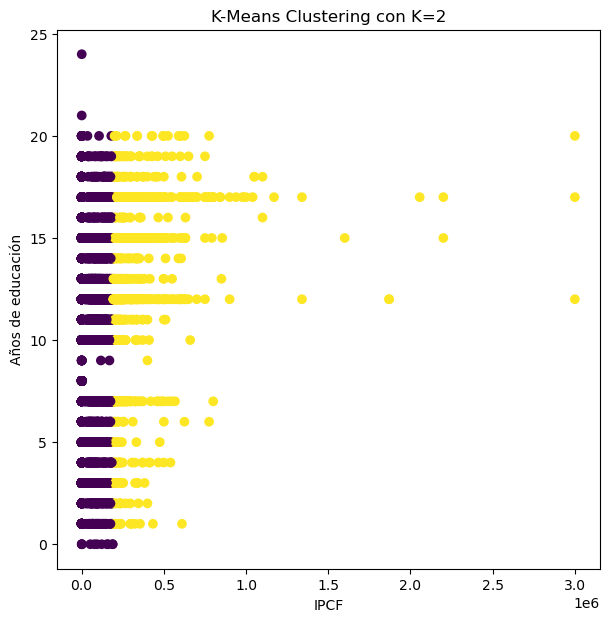

In [6]:
import pandas as pd
#df = pd.read_stata(r"C:\Users\caval\Desktop\tp2\creamos_variable.dta")
df = pd.read_stata(r"/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3/creamos_variable.dta")

#Seleccionamos las variables de interes dentro de la base de datos y le pedimos que drope los valores faltantes.
X = df[["ipcf", "anos_educacion"]].dropna()
X

#Corremos el algoritmo de k medias. Este es particular considera dos clusters. 
from sklearn.cluster import KMeans, AgglomerativeClustering
X = df[["ipcf", "anos_educacion"]].dropna()
kmeans2 = KMeans(n_clusters=2, random_state=10, init="random", n_init=20).fit(X)

#Graficamos
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.scatter(X["ipcf"], X["anos_educacion"], c=kmeans2.labels_, cmap="viridis")
ax.set_xlabel("IPCF")
ax.set_ylabel("Años de educación")
ax.set_title("K-Means Clustering con K=2")
plt.show()

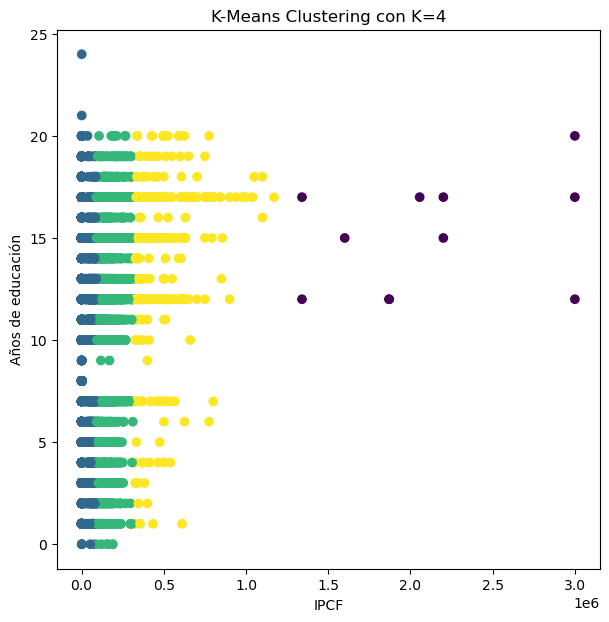

In [8]:
kmeans4 = KMeans(n_clusters=4, random_state=10, init="random", n_init=20).fit(X)

fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.scatter(X["ipcf"], X["anos_educacion"], c=kmeans4.labels_, cmap="viridis")
ax.set_xlabel("IPCF")
ax.set_ylabel("Años de educación")
ax.set_title("K-Means Clustering con K=4")
plt.show()

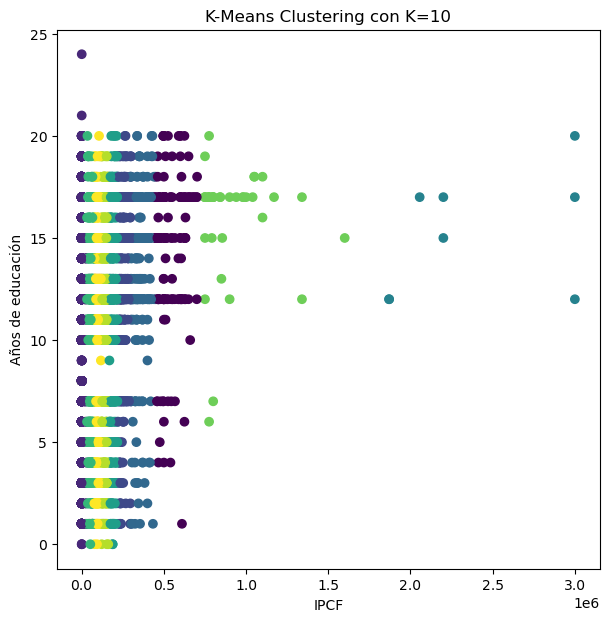

In [10]:
kmeans10 = KMeans(n_clusters=10, random_state=10, init="random", n_init=20).fit(X)

fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.scatter(X["ipcf"], X["anos_educacion"], c=kmeans10.labels_, cmap="viridis")
ax.set_xlabel("IPCF")
ax.set_ylabel("Años de educación")
ax.set_title("K-Means Clustering con K=10")
plt.show()

Parte II-2b CHEQUEARRRRRRRRRRRRRRRRRR

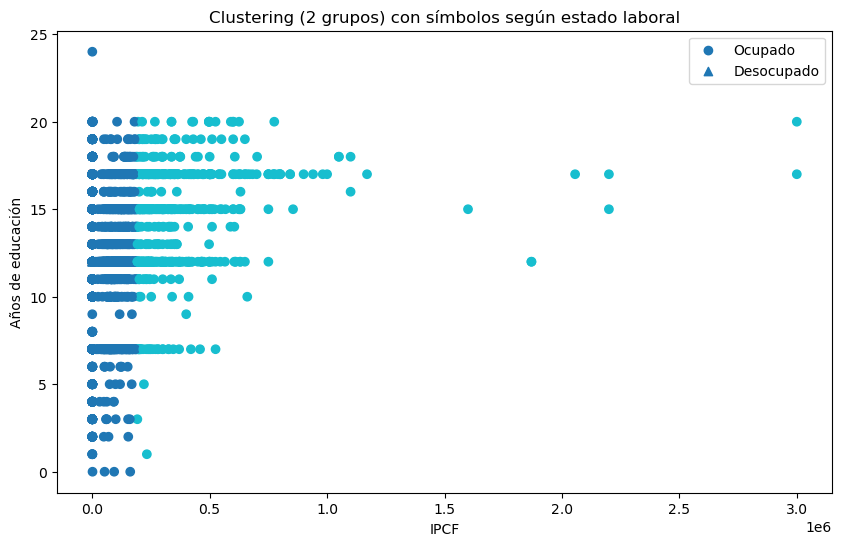

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Selección de datos y limpieza
Y = df[["ipcf", "anos_educacion", "estado"]].dropna()
# Clustering con solo 2 clústeres
kmeans2y = KMeans(n_clusters=2, random_state=10, init="random", n_init=20).fit(Y[["ipcf", "anos_educacion"]])

# Añadir etiquetas de clúster
Y = Y.copy()
Y["cluster"] = kmeans2y.labels_

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Ocupados → círculos
ocupados = Y[Y["estado"] == 1]
ax.scatter(ocupados["ipcf"], ocupados["anos_educacion"],
           c=ocupados["cluster"], cmap="tab10", marker='o', label="Ocupado")

# Desocupados → triángulos
desocupados = Y[Y["estado"] == 0]
ax.scatter(desocupados["ipcf"], desocupados["anos_educacion"],
           c=desocupados["cluster"], cmap="tab10", marker='^', label="Desocupado")

# Etiquetas y leyenda
ax.set_xlabel("IPCF")
ax.set_ylabel("Años de educación")
ax.legend()
plt.title("Clustering (2 grupos) con símbolos según estado laboral")
plt.show()

KeyError: 'estado'

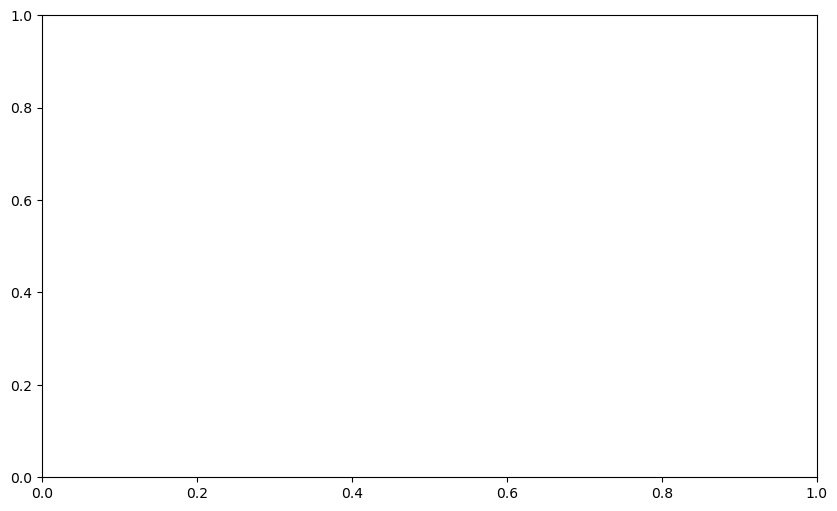

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Selección de datos y limpieza
Y = df[["ipcf", "anos_educacion"]].dropna()

# Clustering con solo 2 clústeres
kmeans2y = KMeans(n_clusters=2, random_state=10, init="random", n_init=20).fit(Y[["ipcf", "anos_educacion"]])

# Añadir etiquetas de clúster
Y = Y.copy()
Y["cluster"] = kmeans2y.labels_

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Ocupados → círculos
ocupados = Y[Y["estado"] == 1]
ax.scatter(ocupados["ipcf"], ocupados["anos_educacion"],
           c=ocupados["cluster"], cmap="tab10", marker='o', label="Ocupado")

# Desocupados → triángulos
desocupados = Y[Y["estado"] == 2]
ax.scatter(desocupados["ipcf"], desocupados["anos_educacion"],
           c=desocupados["cluster"], cmap="tab10", marker='^', label="Desocupado")

# Etiquetas y leyenda
ax.set_xlabel("IPCF")
ax.set_ylabel("Años de educación")
ax.legend()
plt.title("Clustering (2 grupos) con símbolos según estado laboral")
plt.show()

Partr II-3

HAAAAAAAAAAAACERRRRRRR CON EL CODIGO DE MARTI SIN PLAGIO!!!!!!!!!

ch06              float64
ipcf              float64
p47t              float64
pp11b2_ano        float64
v4_m              float64
ch04                int32
ch07                int32
ch08                int32
nivel_ed            int32
estado              int32
pp10a              object
anos_educacion    float64
dtype: object


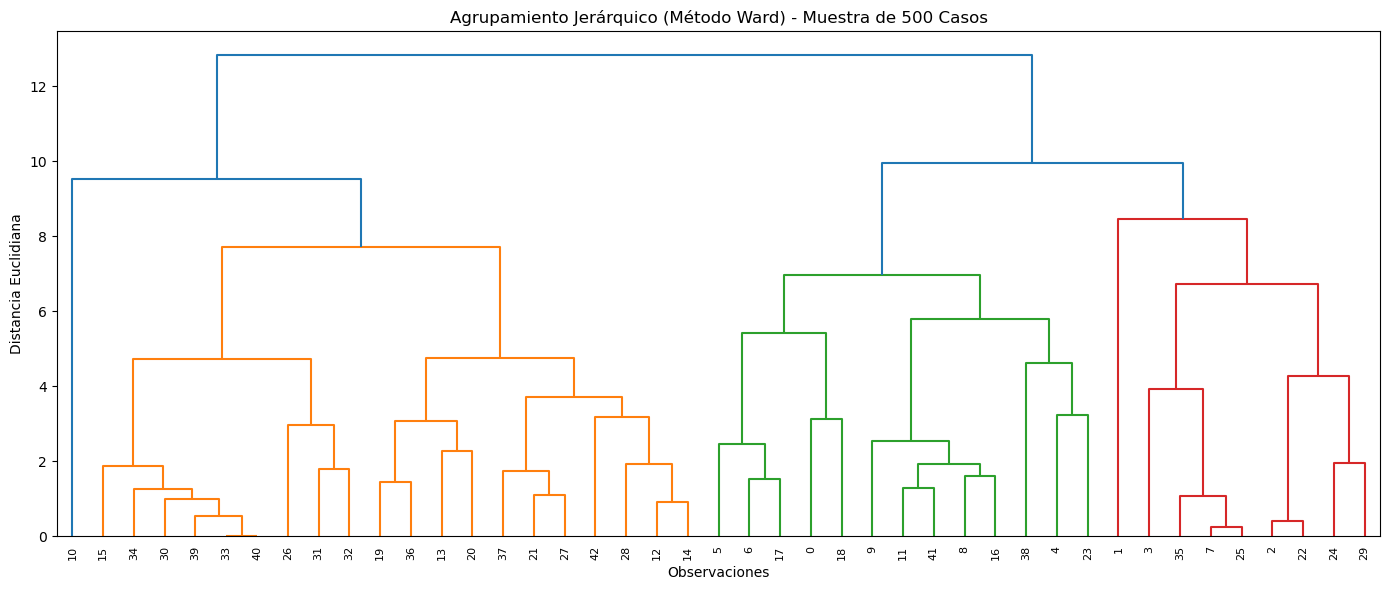

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

# Ruta al archivo .dta
archivo = r"/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3/creamos_variable.dta"
# Cargar la base de datos
data = pd.read_stata(archivo)

print(muestra.dtypes)

# Crear una muestra aleatoria con datos completos
muestra = data[campos_validos].dropna().sample(n=500, random_state=123)

muestra['pp10a'] = pd.to_numeric(muestra['pp10a'], errors='coerce')

muestra = muestra.dropna()  

# Selección de variables relevantes (se filtran las que existen en el DataFrame)
campos = ['ch06', 'ipcf', 'p47t', 'pp11b2_ano', 'v4_m', 'ch04', 'ch07', 'ch08', 'nivel_ed', 'estado', 'pp10a', 'anos_educacion']
campos_validos = [col for col in campos if col in data.columns]

# Estandarizar variables
escalador = StandardScaler()
datos_escalados = escalador.fit_transform(muestra)

# Generar la matriz de enlaces para el clustering jerárquico
matriz_enlace = linkage(datos_escalados, method='ward', metric='euclidean')

# Graficar el dendrograma
plt.figure(figsize=(14, 6))
dendrogram(matriz_enlace, truncate_mode="level", p=25)
plt.title("Agrupamiento Jerárquico (Método Ward) - Muestra de 500 Casos")
plt.xlabel("Observaciones")
plt.ylabel("Distancia Euclidiana")
plt.tight_layout()
plt.show()


Estoy al tanto de que son pocas obs, pero estamos eliminando todas las que la variable de ... de pp10a no genero bien, pasa eso. 

PAAAAAAAAAAAAAAAAAARTE 3!!!!!!!!!!!!!!!1 ==> TOMI DIJO QUE ESTA PARTE TENIA UNA TRAMPA!!!

Parte 3 - punto 1

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/var/folders/qv/cfqltfhj5ys0ymt_tsnsthmh0000gn/T/ipykernel_19219/1940589270.py:7: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_stata("/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3\df_final_limpiaaa.dta")


float64
Ingreso 2004 ajustado:
count    1.956000e+03
mean     2.257807e+05
std      2.149085e+05
min      8.000000e+03
25%      7.500000e+04
50%      1.500000e+05
75%      3.000000e+05
max      1.350000e+06
Name: p47t, dtype: float64


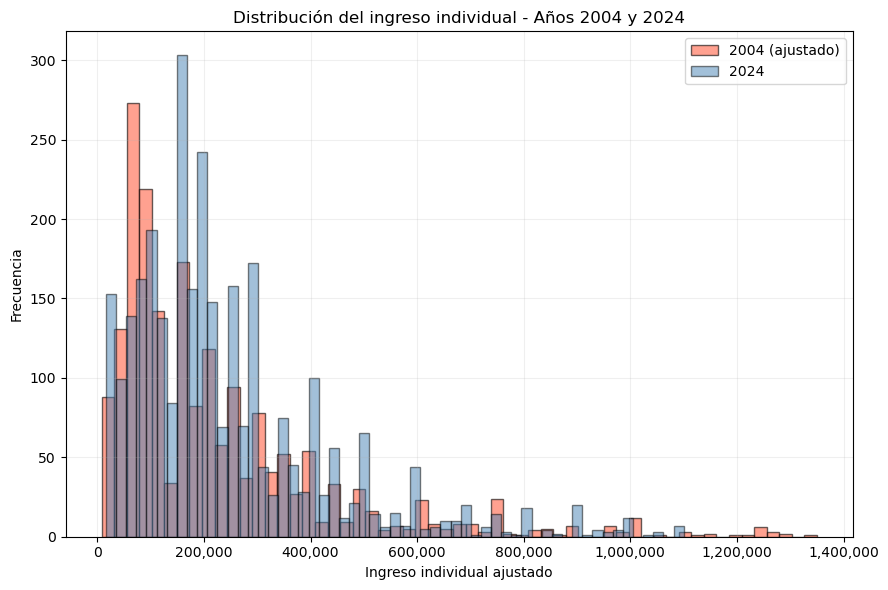

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Cargar la base
df = pd.read_stata("/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3\df_final_limpiaaa.dta")

# Filtrar personas que reportaron su condición de actividad
df = df[df['estado'].isin([1, 2, 3])]


# Separar por año
ingreso = "p47t"

print(df[ingreso].dtype)
print("Ingreso 2004 ajustado:")
print(df_04[ingreso].describe())

df_04 = df[df["ano4"] == 2004].copy()
df_24 = df[df["ano4"] == 2024].copy()

# Eliminar ceros y valores negativos
df_04 = df_04[df_04[ingreso] > 0]
df_24 = df_24[df_24[ingreso] > 0]

# Recorte de outliers por percentiles
def sin_outliers(df, columna):
    q_low = df[columna].quantile(0.01)
    q_high = df[columna].quantile(0.99)
    return df[(df[columna] >= q_low) & (df[columna] <= q_high)]

df_04 = sin_outliers(df_04, ingreso)
df_24 = sin_outliers(df_24, ingreso)

# Ajustar por inflación (se puede justificar el factor según IPC acumulado)
ajuste_inflacion = 500
df_04.loc[:, ingreso] = df_04[ingreso] * ajuste_inflacion

# Calcular bins con Freedman-Diaconis
def elegir_bins(serie):
    q1 = np.percentile(serie, 25)
    q3 = np.percentile(serie, 75)
    iqr = q3 - q1
    ancho_bin = 2 * iqr / (len(serie) ** (1/3))
    cantidad_bins = int((serie.max() - serie.min()) / ancho_bin)
    return max(cantidad_bins, 12)

# Bins calculados sobre los datos combinados
datos_totales = pd.concat([df_04[ingreso], df_24[ingreso]])
n_bins = elegir_bins(datos_totales)

# Gráfico
plt.figure(figsize=(9, 6))
plt.hist(df_04[ingreso], bins=n_bins, alpha=0.6, color="tomato", label="2004 (ajustado)", edgecolor="black")
plt.hist(df_24[ingreso], bins=n_bins, alpha=0.5, color="steelblue", label="2024", edgecolor="black")

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title("Distribución del ingreso individual - Años 2004 y 2024")
plt.xlabel("Ingreso individual ajustado")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

# Guardar la base filtrada
df.to_stata(r"/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3\respondieron.dta", write_index=False)

In [560]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Parte 3 punto 2a

In [96]:
import pandas as pd

# Cargar la base
ruta = r"/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3\df_final_limpia.dta"
df = pd.read_stata(ruta)

# A. Variable: al menos un desocupado en el hogar
# Si algún integrante del hogar tiene ESTADO == 2 (desocupado), se asigna 1; si no, 0
df["hogar_desocupado"] = df.groupby("codusu")["estado"].transform(
    lambda estados: int(2 in estados.tolist())
)
# B. Ingreso del hogar sumando solo a quienes están ocupados y declaran ingreso positivo
# Primero, filtramos los individuos que cumplen ambas condiciones
ocupados_con_ingreso = df[(df["estado"] == 1) & (df["p47t"] > 0)]

# Luego, sumamos el ingreso total por hogar
ingreso_por_hogar = ocupados_con_ingreso.groupby("codusu")["p47t"].sum().reset_index()
ingreso_por_hogar.rename(columns={"p47t": "ingreso_ocupados"}, inplace=True)

# Finalmente, lo unimos al DataFrame original
df = df.merge(ingreso_por_hogar, on="codusu", how="left")

# Si algún hogar no tiene ocupados con ingreso, asignamos 0
df["ingreso_ocupados"] = df["ingreso_ocupados"].fillna(0)


/var/folders/qv/cfqltfhj5ys0ymt_tsnsthmh0000gn/T/ipykernel_19219/637050973.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["hogar_desocupado"] = df.groupby("codusu")["estado"].transform(


Parte 3 punto 2b

In [120]:
# Crear una nueva columna con el ingreso válido solo para ocupados con ingreso mayor a 0
df["ingreso_ocupado"] = df.loc[(df["estado"] == 1) & (df["p47t"] > 0), "p47t"]
df["ingreso_ocupado"] = df["ingreso_ocupado"].fillna(0)

# Agrupar por hogar y año para obtener ingreso total del hogar
ingreso_hogar = (
    df.groupby(["codusu", "ano4"])[["ingreso_ocupado"]]
    .sum()
    .rename(columns={"ingreso_ocupado": "ingreso_total_hogar"})
    .reset_index()
)

# Filtrar hogares con ingreso total positivo
hogares_validos = ingreso_hogar[ingreso_hogar["ingreso_total_hogar"] > 0]

df.to_stata(r"/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3\hogares_validos.dta", write_index=False)

Parte 3 punto 3c

In [118]:
# Cargar la base
ruta = r"/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3\hogares_validos.dta"
df = pd.read_stata(ruta)

from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import numpy as np

# Años a analizar
anios = [2004, 2024]

# Bandwidth elegido (puede ajustarse)
bw = 50000

for anio in anios:
    data_anio = df[df["ano4"] == anio]
    
    # Separar hogares con/sin desocupados
    ingresos_con_desocupados = data_anio[data_anio["hogar_desocupado"] == 1]["hogares_validos"].values.reshape(-1, 1)
    ingresos_sin_desocupados = data_anio[data_anio["hogar_desocupado"] == 0]["hogares_validos"].values.reshape(-1, 1)
    
    # Rango común para graficar
    x_plot = np.linspace(0, 1_200_000, 1000).reshape(-1, 1)
    
    # Estimar KDE con kernel uniforme
    kde_con = KernelDensity(kernel='tophat', bandwidth=bw).fit(ingresos_con_desocupados)
    kde_sin = KernelDensity(kernel='tophat', bandwidth=bw).fit(ingresos_sin_desocupados)
    
    # Obtener log-densidad y convertir a densidad
    log_dens_con = kde_con.score_samples(x_plot)
    log_dens_sin = kde_sin.score_samples(x_plot)
    
    dens_con = np.exp(log_dens_con)
    dens_sin = np.exp(log_dens_sin)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(x_plot, dens_con, label="Con desocupados", color="tomato", linestyle='--')
    plt.plot(x_plot, dens_sin, label="Solo ocupados", color="seagreen")
    plt.fill_between(x_plot.ravel(), dens_con, alpha=0.2, color="tomato")
    plt.fill_between(x_plot.ravel(), dens_sin, alpha=0.2, color="seagreen")
    
    plt.title(f"Distribución del ingreso por hogar - {anio} (Kernel uniforme)")
    plt.xlabel("Ingreso total del hogar")
    plt.ylabel("Densidad estimada")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

KeyError: 'hogares_validos'